In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [3]:
data=pd.read_csv("Downloads/imports-85.data",names=["symboling","normalisedlosses","make","fueltype","aspiration","numofdoors","bodystyle","drivewheels","enginelocation","wheelbase","length","width","height","curbweight","enginetype","numofcylinders","enginesize","fuelsystem","bore","stroke","cratio","bhp","rpm","citympg","highwaympg","price"],na_values="?",)

In [4]:
data.head()

,symboling,normalisedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,bore,stroke,cratio,bhp,rpm,citympg,highwaympg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
data.drop(["make"],axis = 1)

,symboling,normalisedlosses,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,...,enginesize,fuelsystem,bore,stroke,cratio,bhp,rpm,citympg,highwaympg,price
0,3,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


<h1 style = "color:red";> Checking Null values </h1>

In [6]:
data.normalisedlosses.isnull().sum()

41

In [7]:
data.stroke.isnull().sum()

4

In [8]:
data.bore.isnull().sum()

4

In [9]:
data.numofdoors.isnull().sum()

2

In [10]:
data.bhp.isnull().sum()

2

In [11]:
data.rpm.isnull().sum()

2

In [12]:
data.price.isnull().sum()

4

In [13]:
data.numofdoors.isnull().sum()

2

<h1 style="color:green">Identifying outlayers using boxplot</h1>

{'whiskers': [<matplotlib.lines.Line2D at 0x24173faabe0>,
 'caps': [<matplotlib.lines.Line2D at 0x24173fb7340>,
 'boxes': [<matplotlib.lines.Line2D at 0x24173faa850>],
 'medians': [<matplotlib.lines.Line2D at 0x24173fb7a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x24173fb7df0>],
 'means': []}

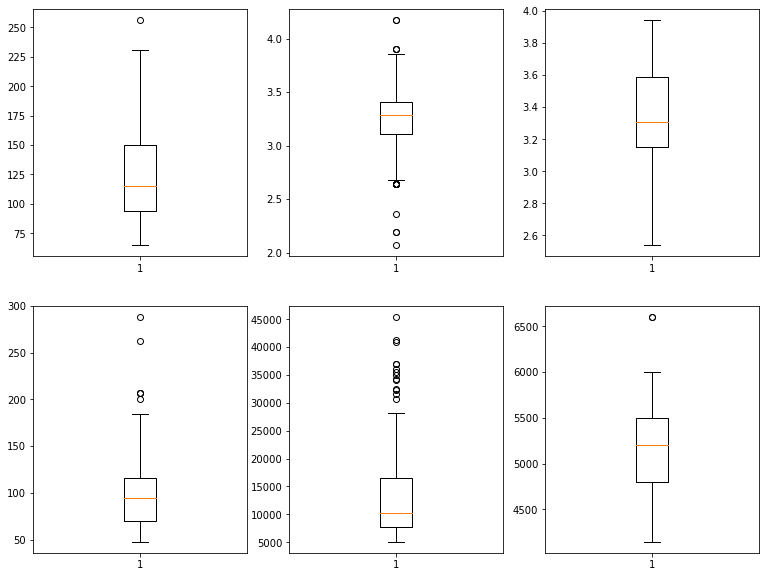

In [14]:
plt.figure(figsize=[13,10])
plt.subplot(2,3,1)
plt.boxplot(data.normalisedlosses.dropna())
plt.subplot(2,3,2)
plt.boxplot(data.stroke.dropna())
plt.subplot(2,3,3)
plt.boxplot(data.bore.dropna())
plt.subplot(2,3,4)
plt.boxplot(data.bhp.dropna())
plt.subplot(2,3,5)
plt.boxplot(data.price.dropna())
plt.subplot(2,3,6)
plt.boxplot(data.rpm.dropna())


<h1 style = "color:blue";> Filling Null values </h1>

In [15]:
data.normalisedlosses.fillna(data.normalisedlosses.median(),inplace=True)

In [16]:
data.stroke.fillna(data.stroke.median(),inplace=True)

In [17]:
data.bore.fillna(data.bore.mean(),inplace=True)

In [18]:
data.bhp.fillna(data.bhp.median(),inplace=True)

In [19]:
data.price.fillna(data.price.median(),inplace=True)

In [20]:
data.rpm.fillna(data.rpm.median(),inplace=True)

In [21]:
data.numofdoors.fillna(data.numofdoors.mode(),inplace=True)

<h2 style = "color:red";>Pearson Correlation Test for all Continous data</h2>

In [22]:
stats.pearsonr(data.normalisedlosses,data.price)

(0.09548893712250724, 0.17321440617487469)

S           M            WEEK             M                   S
----------------------------------------------------------------
-1    -09     -07          0         0.7    0.9             1

In [23]:
stats.pearsonr(data.wheelbase,data.price)

(0.584846838972225, 3.338017082369928e-20)

S           M            WEEK             M                   S
----------------------------------------------------------------
-1    -09     -07          0         0.7    0.9             1 

In [24]:
stats.pearsonr(data.enginesize,data.price)

(0.8603427324326134, 2.511193868051146e-61)

S           M            WEEK             M                   S
----------------------------------------------------------------
-1    -09     -07          0         0.7    0.9             1

In [25]:
stats.pearsonr(data.bore,data.price)

(0.5328649013633638, 1.9629473253558344e-16)

S           M            WEEK             M                   S
----------------------------------------------------------------
-1    -09     -07          0         0.7    0.9             1

In [26]:
stats.pearsonr(data.stroke,data.price)

(0.08362710782152097, 0.23321191098305122)

S           M            WEEK             M                   S
----------------------------------------------------------------
-1    -09     -07          0         0.7    0.9             1

In [27]:
stats.pearsonr(data.cratio,data.price)

(0.07289043869078718, 0.2989754575667938)

S           M            WEEK             M                   S
----------------------------------------------------------------
-1    -09     -07          0         0.7    0.9             1

In [28]:
stats.pearsonr(data.bhp,data.price)

(0.7499191229023526, 2.7701494645427533e-38)

S           M            WEEK             M                   S
----------------------------------------------------------------
-1    -09     -07          0         0.7    0.9             1

In [29]:
stats.pearsonr(data.rpm,data.price)

(-0.107282914606469, 0.12574783680166546)

S           M            WEEK             M                   S
----------------------------------------------------------------
-1    -09     -07          0         0.7    0.9             1

In [30]:
stats.pearsonr(data.citympg,data.price)

(-0.6688215192284404, 6.034974884198224e-28)

S           M            WEEK             M                   S
----------------------------------------------------------------
-1    -09     -07          0         0.7    0.9             1

In [31]:
stats.pearsonr(data.highwaympg,data.price)

(-0.6930373012364786, 1.1310420947833799e-30)

S           M            WEEK             M                   S
----------------------------------------------------------------
-1    -09     -07          0         0.7    0.9             1

<h2 style = "color:green";>Linear Regression for Engine size and price</h2>

In [32]:
y=data.price
x=data.enginesize

In [33]:
train_y=y.iloc[0:164]
train_x=x.iloc[0:164]

In [34]:
test_y=y.iloc[164:]
test_x=x.iloc[164:]

In [35]:
train_x=sm.add_constant(train_x)
test_x=sm.add_constant(test_x)

C:\Users\VICKY R R\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
model = sm.OLS(train_y,train_x).fit()
model1 = sm.OLS(test_y,test_x).fit()

In [37]:
predict_train_x=model.predict(train_x)
print(predict_train_x)


0      13805.523965
1      13805.523965
2      17457.300662
3      10319.737117
4      14801.463064
           ...     
159    10485.726967
160     8493.848769
161     8493.848769
162     8493.848769
163     8493.848769
Length: 164, dtype: float64


In [38]:
predict_test_x=model1.predict(test_x)
print(predict_test_x)

164     9323.428131
165     9323.428131
166     9323.428131
167    14917.476280
168    14917.476280
169    14917.476280
170    14917.476280
171    14917.476280
172    14917.476280
173    12120.452206
174    10721.940169
175    12120.452206
176    12120.452206
177    12120.452206
178    17831.043024
179    17831.043024
180    17831.043024
181    16665.616326
182     9206.885462
183    10605.397499
184     9206.885462
185    10605.397499
186    10605.397499
187     9206.885462
188    10605.397499
189    10605.397499
190    10605.397499
191    13752.049582
192     9206.885462
193    10605.397499
194    14334.762931
195    14334.762931
196    14334.762931
197    14334.762931
198    13052.793564
199    13052.793564
200    14334.762931
201    14334.762931
202    18064.128363
203    14800.933610
204    14334.762931
dtype: float64


In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     532.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           4.34e-53
Time:                        09:43:09   Log-Likelihood:                -1597.7
No. Observations:                 164   AIC:                             3199.
Df Residuals:                     162   BIC:                             3206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7773.1565    964.572     -8.059      0.000   -9677.912   -5868.401
enginesize   165.9898      7.192     23.081      0.000     151.788     180.191
==============================================================================
Omnibus:                       18.200   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.388
Skew:                           0.487   Prob(JB):                     7.61e-09
Kurtosis:                       5.127   Cond. No.                         400.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model.params

const        -7773.156519
enginesize     165.989850
dtype: float64

<AxesSubplot:xlabel='enginesize', ylabel='price'>

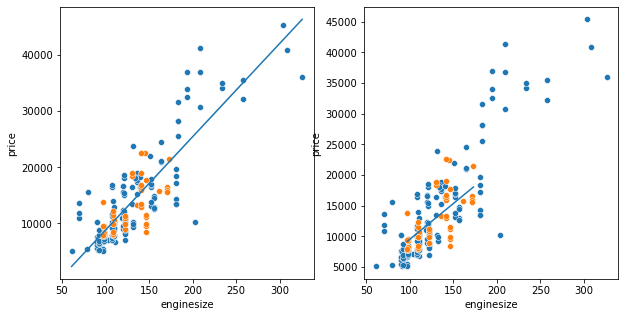

In [41]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.scatterplot(x=train_x.enginesize,y=train_y)
sns.scatterplot(x=test_x.enginesize,y=test_y)
sns.lineplot(x=train_x.enginesize,y=predict_train_x)
plt.subplot(1,2,2)
sns.scatterplot(x=train_x.enginesize,y=train_y)
sns.scatterplot(x=test_x.enginesize,y=test_y)
sns.lineplot(x=test_x.enginesize,y=predict_test_x)

<h2> Linear Regression for bhp and Price </h2> 

In [42]:
x = data.bhp
y = data.price

In [43]:
train_x = x.iloc[0:164]
train_y = y.iloc[0:164]

In [44]:
test_x = x.iloc[164:]
test_y = y.iloc[164:]

In [45]:
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)

C:\Users\VICKY R R\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
model = sm.OLS(train_y,train_x).fit()
model1 = sm.OLS(test_y,test_x).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     229.0
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           8.20e-33
Time:                        09:43:11   Log-Likelihood:                -1644.8
No. Observations:                 164   AIC:                             3294.
Df Residuals:                     162   BIC:                             3300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3027.4402   1155.785     -2.619      0.010   -5309.787    -745.093
bhp          157.4015     10.401     15.133      0.000     136.862     177.941
==============================================================================
Omnibus:                       36.388   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.416
Skew:                          -0.225   Prob(JB):                     1.12e-87
Kurtosis:                      10.642   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model.params

const   -3027.440167
bhp       157.401478
dtype: float64

In [49]:
predict_train_x = model.predict(train_x)
predict_test_x = model1.predict(test_x)

In [50]:
print(predict_train_x)

0      14444.123874
1      14444.123874
2      21212.387421
3      13027.510573
4      15073.729785
           ...     
159     5787.042592
160     7990.663282
161     7990.663282
162     7990.663282
163     7990.663282
Length: 164, dtype: float64


In [51]:
print(predict_test_x)

164     9398.607658
165    13279.505890
166    13279.505890
167    13649.115245
168    13649.115245
169    13649.115245
170    13649.115245
171    13649.115245
172    13649.115245
173    11431.459113
174     9675.814675
175    11431.459113
176    11431.459113
177    11431.459113
178    17807.220492
179    17807.220492
180    17345.208798
181    17345.208798
182     7735.365559
183    10784.642741
184     7735.365559
185    10784.642741
186    10784.642741
187     9213.802981
188    12170.677823
189    11246.654435
190    11246.654435
191    13094.701212
192     9213.802981
193    11061.849757
194    13464.310567
195    13464.310567
196    13464.310567
197    13464.310567
198    17899.622831
199    17899.622831
200    13464.310567
201    17714.818154
202    15312.357344
203    12725.091857
204    13464.310567
dtype: float64


<AxesSubplot:xlabel='bhp', ylabel='price'>

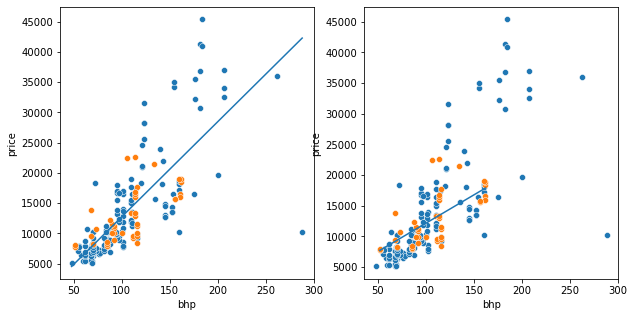

In [52]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.scatterplot(x=train_x.bhp,y=train_y)
sns.scatterplot(x=test_x.bhp,y=test_y)
sns.lineplot(x=train_x.bhp,y=predict_train_x)
plt.subplot(1,2,2)
sns.scatterplot(x=train_x.bhp,y=train_y)
sns.scatterplot(x=test_x.bhp,y=test_y)
sns.lineplot(x=test_x.bhp,y=predict_test_x)

<h1 style = "color:violet";> Hypothesis testing </h1>


<h3 style = "color:orange";> Price compared with Symboling </h3>

In [53]:
data.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [54]:
s1=data.price[data.symboling==3]
s2=data.price[data.symboling==1]
s3=data.price[data.symboling==2]
s4=data.price[data.symboling==0]
s5=data.price[data.symboling==-1]
s6=data.price[data.symboling==-2]

In [55]:
stats.f_oneway(s1,s2,s3,s4,s5,s6)

F_onewayResult(statistic=6.966049286659943, pvalue=5.099750825967775e-06)

<h3 style = "color:green";> price compared with fueltype </h3>

In [56]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [57]:
f1=data.price[data.fueltype=="gas"]
f2=data.price[data.fueltype=="diesel"]

In [58]:
stats.ttest_ind(f1,f2)

Ttest_indResult(statistic=-1.6122331626981947, pvalue=0.10846478964915504)

<h3 style = "color:orange";> Price compared with Aspiration</h3>

In [59]:
data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [60]:
a1=data.price[data.aspiration=="std"]
a2=data.price[data.aspiration=="turbo"]


In [61]:
stats.ttest_ind(a1,a1)

Ttest_indResult(statistic=0.0, pvalue=1.0)

<h3 style = "color:blue";> Price compared with No.of.doors </h3>

In [62]:
data.numofdoors.nunique()

2

In [63]:
n1=data.price[data.numofdoors=="two"]
n2=data.price[data.numofdoors=="four"]

In [64]:
stats.ttest_ind(n1,n2)

Ttest_indResult(statistic=-0.7176714250640884, pvalue=0.4737931587114491)

<h3 style = "color:red";> Price compared with Bodystyle </h3>

In [65]:
data.bodystyle.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [66]:
b1=data.price[data.bodystyle=="convertible"]
b2=data.price[data.bodystyle=="hatchback"]
b3=data.price[data.bodystyle=="sedan"]
b4=data.price[data.bodystyle=="wagon"]
b5=data.price[data.bodystyle=="hardtop"]

In [67]:
stats.f_oneway(b1,b2,b3,b4,b5)

F_onewayResult(statistic=9.280889884985438, pvalue=6.715744383632092e-07)

<h3 style = "color:green";> Price compared with drivewheels </h3>

In [68]:
data.drivewheels.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [69]:
d1=data.price[data.drivewheels=="rwd"]
d2=data.price[data.drivewheels=="fwd"]
d3=data.price[data.drivewheels=="4wd"]

In [70]:
stats.f_oneway(d1,d2,d3)

F_onewayResult(statistic=67.73579802411511, pvalue=3.07984274260414e-23)

<h3 style = "color:blue";> Price compared with enginelocation </h3>

In [71]:
data.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [72]:
e1=data.price[data.enginelocation=="front"]
e2=data.price[data.enginelocation=="rear"]

In [73]:
stats.ttest_ind(e1,e2)

Ttest_indResult(statistic=-5.005528399121724, pvalue=1.2057381567252149e-06)

<h3 style = "color:blue";> Price compared with Engine type </h3>

In [74]:
data.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [75]:
t1=data.price[data.enginetype=="dohc"]
t2=data.price[data.enginetype=="ohcv"]
t3=data.price[data.enginetype=="ohc"]
t4=data.price[data.enginetype=="l"]
t5=data.price[data.enginetype=="rotor"]
t6=data.price[data.enginetype=="ohcf"]
t7=data.price[data.enginetype=="dohcv"]

In [76]:
stats.f_oneway(t1,t2,t3,t4,t5,t6,t7)

F_onewayResult(statistic=8.41976699929087, pvalue=3.8264558339043966e-08)

<h3 style = "color:red";> Price compared with Num of cylinders </h3>

In [77]:
data.numofcylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [78]:
c1=data.price[data.numofcylinders=="four"]
c2=data.price[data.numofcylinders=="six"]
c3=data.price[data.numofcylinders=="five"]
c4=data.price[data.numofcylinders=="three"]
c5=data.price[data.numofcylinders=="twelve"]
c6=data.price[data.numofcylinders=="two"]
c7=data.price[data.numofcylinders=="eight"]

In [79]:
stats.f_oneway(c1,c2,c3,c4,c5,c6,c7)

F_onewayResult(statistic=43.56071481585832, pvalue=1.0872686269905157e-33)

<h1 style = "color:green";>Another comparison</h1>

<h3> Here, I'm going to compare engine location with city mpg and highway mpg, because Engine location is discrete data, city mpg and highway mpg are continuous data. So engine location may affect the mileage. </h3>

<h3 style = "color:blue";> Citympg compared with Engine location </h3>

In [80]:
data.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [81]:
l1=data.citympg[data.enginelocation=="front"]
l2=data.citympg[data.enginelocation=="rear"]

In [82]:
stats.ttest_ind(l1,l2)

Ttest_indResult(statistic=2.213083357034965, pvalue=0.02800586590479401)

<h3 style = "color:red";> Citympg compared with Engine location </h3>

<h3>Here, I'm going to compare the rear engine position and front engine position with city mpg</h3>

In [83]:
data.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [84]:
s1=data.citympg[data.enginelocation=="front"]
s2=data.citympg[data.enginelocation=="rear"]

In [85]:
s1.head()
s2.head()

126    17
127    17
128    17
Name: citympg, dtype: int64

In [92]:
s1.mean()

25.34158415841584

In [91]:
s2.mean()

17.0

<h3>So we can interpret that the rear position of engine affeect the city mpg </h3>